# Pandemic Graph

We will start by understanding and generating a classic pandemic graph

In [44]:
%run -i "scripts/data_preprocessing.py"

Data preprocessed sucessfully


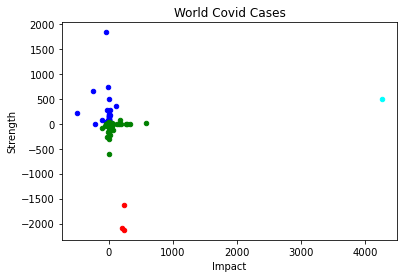

In [45]:
%run -i "scripts/knn.py"

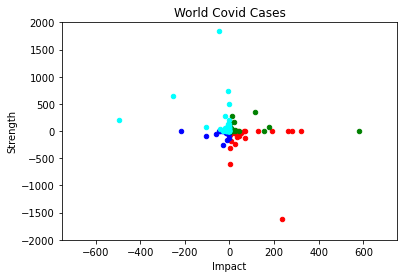

In [46]:
%run -i "scripts/algo.py"

In [130]:
%run -i "scripts/geo_visualization.py"

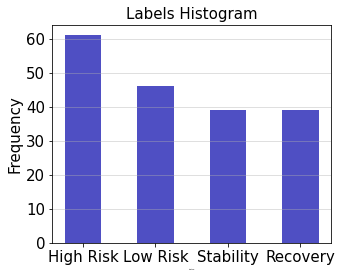

In [174]:
%run -i "scripts/histogram.py"